# 0. Diabetes Classification

Answer the following questions based on `Diabetes Classification.csv`.

**About this file**

Age: Represents the age of the patient in years. Age can be a risk factor for diabetes, as the risk of diabetes increases with age.

Gender: Indicates the gender of the patient, which can be a factor in the prediction of diabetes. Some studies suggest that women may have a different risk than men in developing diabetes.

Body Mass Index (BMI): BMI is a measure that uses a person's height and weight to determine whether they are in the normal weight, overweight, or obese category. A high BMI is associated with a higher risk of diabetes.

Chol: total cholesterol level in the blood. Cholesterol is a fat found in the blood and can come from foods consumed and also be produced by the body. High cholesterol can be a risk factor for heart disease and diabetes.

TG (Triglycerides): Represents the level of triglycerides in the blood. Triglycerides are a type of fat found in the blood, and high levels can also increase the risk of heart disease and diabetes.

HDL (High-Density Lipoprotein): Is the "good" cholesterol that helps transport excess cholesterol from body tissues back to the liver for further processing or excretion. High levels of HDL are usually considered good for heart health.

LDL (Low-Density Lipoprotein): Is the "bad" cholesterol that can cause plaque buildup in the arteries, increasing the risk of heart disease and stroke. High LDL levels can be a risk factor for diabetes.

Cr (Creatinine): A waste product of muscle metabolism that is excreted from the body through the kidneys. Creatinine levels in the blood can provide information about kidney function. Kidney disease may be linked to the risk of diabetes.

BUN (Blood Urea Nitrogen): Is a measure used to evaluate kidney and liver function. High levels of BUN may indicate kidney or liver disorders that can be related to diabetes.

Diagonisis: An indicator that someone has diabetes.

### Question 1: Initial Data Exploration
- **a.** Load the dataset and remove any unnamed or index columns that are not relevant to the analysis. How many columns and rows are present after this operation?
- **b.** What types of data (e.g., numerical, categorical, boolean, ordinal) are present in this dataset?
- **c.** Identify and display the statistical summary for numerical attributes.


# Answer 1a
- Load the data
- Get number of rows and columns

In [4]:

import pandas as pd
df = pd.read_csv('Diabetes Classification1.csv')

num_rows, num_columns = df.shape

#Original number of columns and rows
print(f"Original number of rows: {num_rows}")
print(f"Original number of columns: {num_columns}")

df.head()


Original number of rows: 5132
Original number of columns: 11


,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


- Clean the data by removing unnecessary columns/ rows
- Count columns/ rows present

In [6]:

# Remove unnamed or index columns
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

#Cleaned columns
clean_columns = df.shape[1]
print(f"Number of clean columns: {clean_columns}")

df.head()


Number of clean columns: 10


,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


# Answer 1b
Data types present in our data

In [8]:
df.dtypes

Age            int64
Gender        object
BMI            int64
Chol         float64
TG           float64
HDL          float64
LDL          float64
Cr           float64
BUN          float64
Diagnosis      int64
dtype: object

# Answer 1c
Statistical summary for our data

In [10]:
#Drop the diagnosis column as it relates to categorical data
df_num= df.drop(columns=['Diagnosis'])

#Generate summary
df_num.describe()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969
std,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206
min,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000
25%,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000
50%,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000
75%,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000
max,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000


### Question 2: Data Filtering and Analysis
- **a.** How many individuals are diagnosed with diabetes (where the 'Diagnosis' column is 1)? 
- **b.** Filter the dataset to include only individuals with a Body Mass Index (BMI) over 25 and calculate the average cholesterol level for this group.
- **c.** Identify the gender distribution within the dataset: how many males and females are there?


# Answer 2a
- Individuals diagnosed with Diabetes

In [13]:
#where the 'Diagnosis' column is 1

Diabetic= df[df['Diagnosis'] == 1].shape[0]

print("Total number of individuals with diabetes is", (Diabetic))

Total number of individuals with diabetes is 1993


# Answer 2b
- Individuals with BMI 25+
- Average cholesterol for these individuals

In [15]:
#Filter the dataset to include only individuals with a Body Mass Index (BMI) over 25
over_25_bmi= df[df['BMI'] >25]
print(over_25_bmi.head())

#calculate the average cholesterol level for this group.
avg_chol= over_25_bmi['Chol'].mean()

print("Average cholesterol level for individuals with over 25 BMI=", (avg_chol))

     Age Gender  BMI  Chol   TG  HDL  LDL    Cr  BUN  Diagnosis
125   40      F   30   2.1  2.3  0.9  2.8  52.0  2.1          0
126   40      M   31   6.5  3.8  1.0  3.9  64.0  3.4          0
127   35      F   32   4.0  2.5  1.3  2.3  37.0  4.4          0
129   43      M   29   4.3  1.8  1.6  1.9  60.0  4.4          0
131   54      M   28   4.4  2.9  0.6  2.5  88.0  4.0          0
Average cholesterol level for individuals with over 25 BMI= 5.002230568460308


# Answer 2c
- Gender Distribution of the dataset(male/female)

In [17]:
gender= df['Gender'].value_counts()
print(f"Original {gender}")

#Correct the entries by converting all string values to lowercase
df= df.applymap(lambda s: s.lower() if type(s) == str else s)

gender2= df['Gender'].value_counts()

print(f"Actual {gender2}")
            

Original Gender
M    3256
F    1875
f       1
Name: count, dtype: int64
Actual Gender
m    3256
f    1876
Name: count, dtype: int64


C:\Users\User 1\AppData\Local\Temp\ipykernel_1756\1592564015.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df= df.applymap(lambda s: s.lower() if type(s) == str else s)


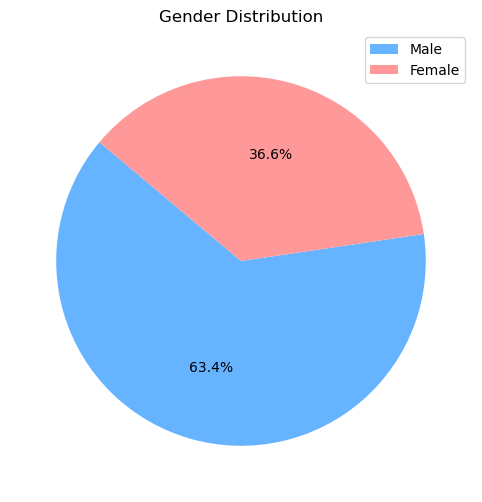

In [18]:
#Draw a visualization for gender distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

gender2.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[ '#66b3ff', '#ff9999'],
    labels=['', '']
)

# Add a title and legend
plt.title('Gender Distribution')
plt.legend(labels=['Male', 'Female'], loc= 'upper right')
plt.ylabel('')
plt.show()


### Question 3: Advanced Filtering and Conditional Analysis
- **a.** For individuals with diabetes, what is the average age for each gender? Use the 'Diagnosis' column to filter for diabetes.
- **b.** Find the average Creatinine (Cr) levels for males and females. Is there a noticeable difference between genders?
- **c.** Among individuals without diabetes, identify those with high triglyceride levels (TG > 1.5) and calculate the average LDL levels for this group.

# Answer 3a
Average age per gender for Diabetic Individuals

In [21]:
#filter Diagnosis column where diabetic individuals = 1
diabetes_df = df[df['Diagnosis'] == 1]

# Average age for each gender
average_age_gender = diabetes_df.groupby('Gender')['Age'].mean()

print(f"Average age per gender for diabetic individuals is{average_age_gender}",)

Average age per gender for diabetic individuals isGender
f    58.411609
m    58.067206
Name: Age, dtype: float64


# Answer 3b
Average Creatinine (Cr) levels for males and females

In [23]:
average_cr_levels = df.groupby('Gender')['Cr'].mean()
print("Average Creatinine levels per ", average_cr_levels)

Average Creatinine levels per  Gender
f    57.846691
m    78.806733
Name: Cr, dtype: float64


### Is there a noticeable difference between genders?

Yes, males have higher creatinine levels at 78.81 while females have 57.85 on average. This is due to the fact that women have lower musce mass than men with the normal levels being between 53-97.2 while for men 61.9-114.9. The higher the creatinine levels, the higher the risk of diabetes.

# Answer 3c
- Individuals without diabetes, identify those with high triglyceride levels (TG > 1.5)
- Calculate the average LDL levels for this group

In [27]:
#Filter the data for individuals without diabetes

without_diabetes= df[df['Diagnosis'] == 0]

#Individuals without diabetes and have high triglyceride levels i.e>1.5
high_tg= without_diabetes[without_diabetes['TG'] > 1.5]

print(high_tg.head())

#Average LDL for high_tg

avg_ldl= round(high_tg['LDL'].mean(),4)
print("Average ldl for this group is", (avg_ldl))

    Age Gender  BMI  Chol   TG  HDL  LDL     Cr   BUN  Diagnosis
7    32      f   24   3.8  2.0  2.4  3.8   28.0   3.6          0
11   45      f   23   4.2  1.7  1.2  2.2   54.0   4.6          0
17   49      f   24   0.5  1.9  1.3  2.8  175.0  13.5          0
23   30      m   19   5.5  1.8  1.2  3.5   80.0   4.8          0
24   41      m   22   2.8  2.9  0.8  3.8   99.0   4.2          0
Average ldl for this group is 2.9291


### Question 4: Data Aggregation and Grouping
- **a.** Group the dataset by 'Diagnosis' and calculate the mean for all numerical columns. What insights can you gather about the differences between individuals with and without diabetes?
- **b.** For each BMI category (underweight < 18.5, normal weight 18.5–24.9, overweight 25–29.9, obese ≥30), calculate the average cholesterol level. How does BMI affect cholesterol levels based on this dataset?
- **c.** Group the data by 'Gender' and 'Diagnosis', and find the average age in each group. What trends can you observe regarding age, gender, and diabetes diagnosis?


# Answer 4a
- Group by Diagnosis column

In [30]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Add the 'Diagnosis' column back
numerical_columns['Diagnosis'] = df['Diagnosis']

# Group by 'Diagnosis' and calculate the average
diagnosis_group_mean = numerical_columns.groupby('Diagnosis').mean()
print( diagnosis_group_mean)


                 Age        BMI      Chol        TG       HDL       LDL  \
Diagnosis                                                                 
0          43.078687  23.156419  4.762265  1.463711  1.337069  2.740436   
1          58.198194  26.908179  5.031656  2.121927  1.996879  3.187675   

                  Cr       BUN  
Diagnosis                       
0          71.991555  4.718308  
1          69.811152  5.178362  


#### What insights can you gather about the differences between individuals with and without diabetes?

Individuals with diabetes:
- Are much older with an average age of 58 versus 43 years for non-diabetics
- Have a higher BMI which is an indicator of diabetes in this case as compared to non-diabetics with lower BMI
- Have high cholesterol levels, which indicate lots of fat presence in the blood
- Have high TGI levels
- Have high HDL levels
- Have high LDL levels
- Have lower creatinine levels
- Have high BUN levels since the kidneys and liver are affected resulting in diabetes

# Answer 4b
- Calculate the average cholesterol level for each BMI category (underweight < 18.5, normal weight 18.5–24.9, overweight 25–29.9, obese ≥30)

In [34]:
# Define BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply BMI categories
df['BMI Category'] = df['BMI'].apply(bmi_category)

# Average cholesterol level for each BMI category
avg_cholesterol_bmi = df.groupby('BMI Category')['Chol'].mean()
print("Average cholesterol level for each BMI category", avg_cholesterol_bmi)


Average cholesterol level for each BMI category BMI Category
Normal weight    4.802203
Obese            4.969413
Overweight       4.986071
Underweight      4.436639
Name: Chol, dtype: float64


### How does BMI affect cholesterol levels based on this dataset?

Individuals with higher BMI have higher cholesterol levels indicating a positive relationship. Therefore, as bmi increases so does the cholesterol level.

# Answer 4c
- Group the data by 'Gender' and 'Diagnosis', and find the average age in each group

In [38]:
df.groupby(['Gender', 'Diagnosis'])['Age'].mean()

Gender  Diagnosis
f       0            42.849732
        1            58.411609
m       0            43.205344
        1            58.067206
Name: Age, dtype: float64

### What trends can you observe regarding age, gender, and diabetes diagnosis?

Gender has negligible effect on the diagnosis as compared to age. The average age for  individuals in both genders is 58 years for diabetic individuals and 43 years for non diabetic individuals